<a href="https://colab.research.google.com/github/phanducminh201/Model_training_in_ML/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE LIBRARIES**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# **CREATING DATA**

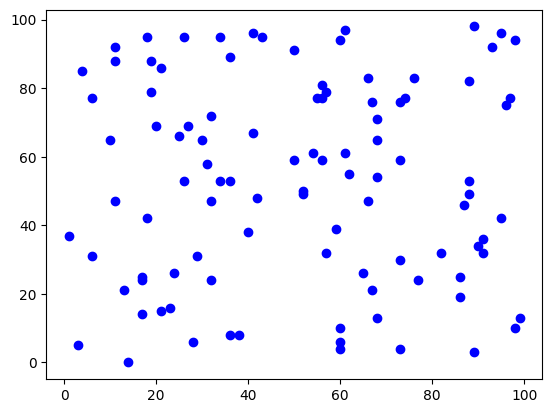

In [ ]:
data = np.random.randint(0,100, (100,2))

for i in range(data.shape[0]):
  plt.scatter(data[i][0], data[i][1], color="blue")

# **DEFINE OF IMPLEMENTATION STEPS**

In [ ]:
def choice_center(data, k):
  return data[np.random.choice(data.shape[0], k, replace=False)]

In [ ]:
def distance(x1, x2):
  return np.round( np.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2),2)

In [ ]:
def assign_center(data, centers, k):
  groups = np.zeros(data.shape[0], dtype=int)
  for i in range(data.shape[0]):
    d = []
    for j in range(centers.shape[0]):
      d.append(distance(data[i] ,centers[j]))
    groups[i] = np.argmin(d)
  return groups


In [ ]:
def update_centers(data, groups):
  centers = np.zeros((k, 2))
  for j in range(centers.shape[0]):
    sum_x = sum_y = 0
    soluong = 0
    for i in range(data.shape[0]):
      if groups[i] == j:
        sum_x += data[i][0]
        sum_y += data[i][1]
        soluong += 1
        centers[j][0] = np.round(sum_x / soluong, 2)
        centers[j][1] = np.round(sum_y / soluong, 2)
  return centers

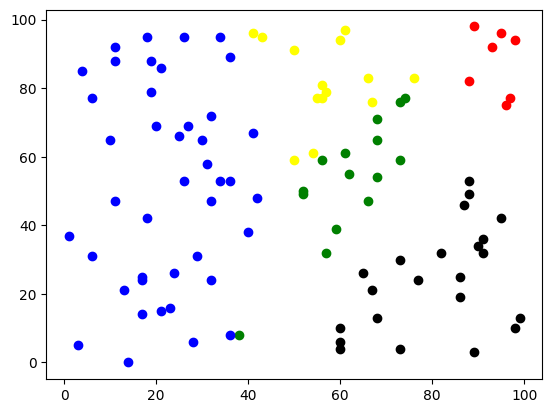

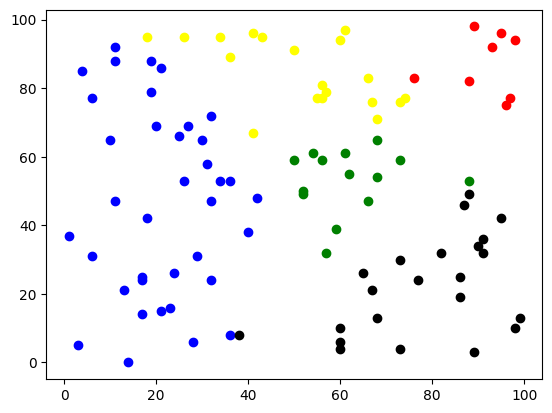

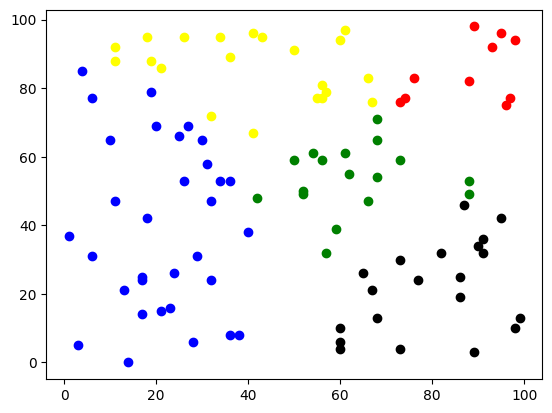

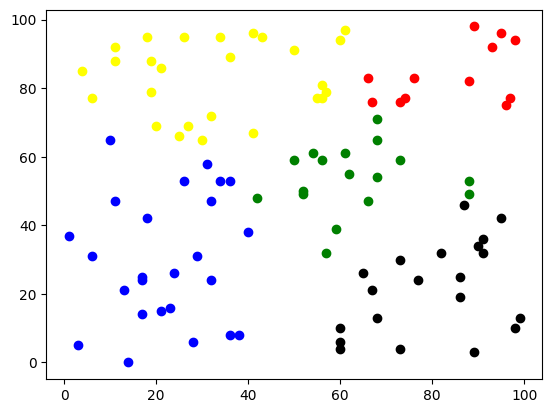

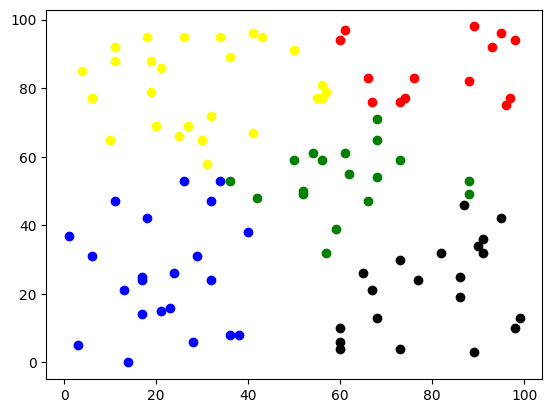

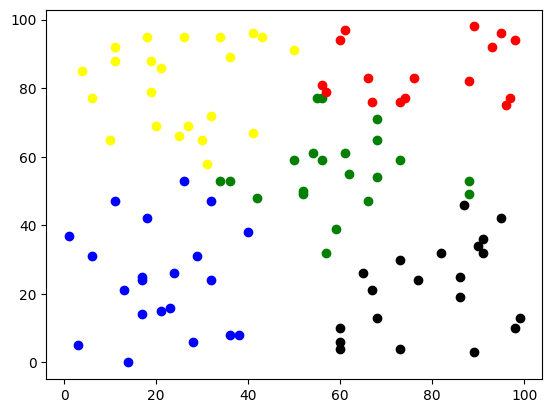

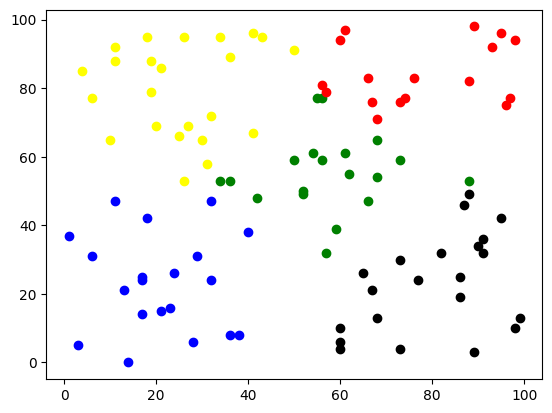

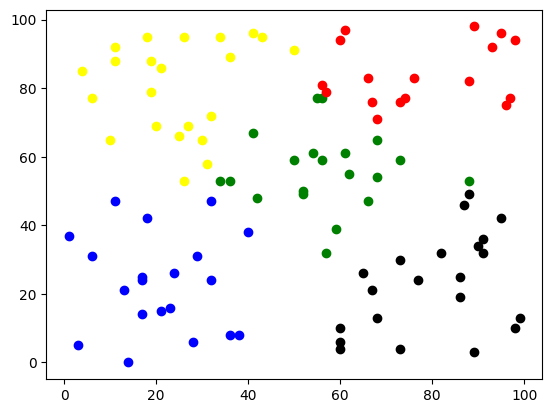

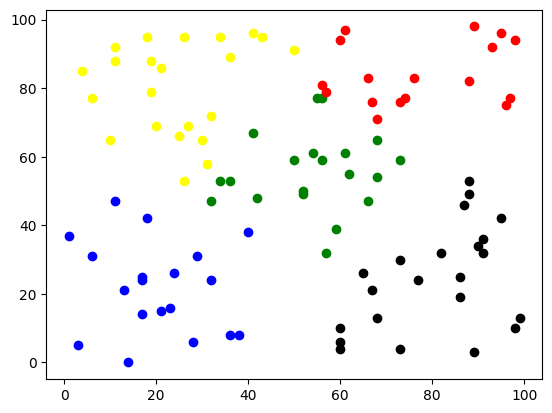

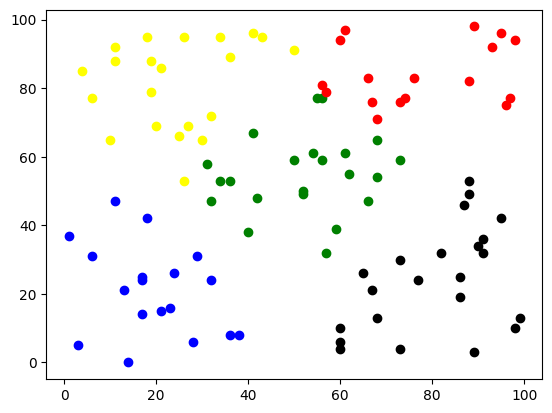

In [ ]:
max_iter = 10
k = 5
centers = choice_center(data, k)
for i in range(max_iter):
  groups = assign_center(data, centers, k)
  centers = update_centers(data, groups)
  color = ["green", "blue", "red", "black", "yellow"]
  plt.figure()
  for j in range(centers.shape[0]):
    plt.scatter(data[groups == j, 0], data[groups == j, 1], c=color[j])

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(data)


Centers found by scikit-learn:
[[21.23809524 24.66666667]
 [49.77777778 75.7962963 ]
 [78.2        26.        ]]
